In [4]:
!pip install pandas
!pip install folium
!pip install geopandas

    100% |████████████████████████████████| 901kB 20.0MB/s 
    100% |████████████████████████████████| 1.5MB 1.2MB/s 
    100% |████████████████████████████████| 2.8MB 9.2MB/s 
    100% |████████████████████████████████| 17.9MB 1.6MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Running setup.py bdist_wheel for munch ... - done
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRTHdbVtExd84gZutdAyM0AkXL64MzOiugVFqg7ZTi9wdHGAUyOKLlZOSD110wo4KcJRlTBufYMJJEh/pub?gid=0&single=true&output=csv")
df.head()

,Locations,Address,lat,lng,Open Hour,Close Hour,Dates,Notes
0,Airport Gardens,"815 Martin Luther King Jr., Blvd, Chapel Hill,...",35.920529,-79.055715,NaN,NaN,NaN,NaN
1,"Barnes Street (Serving Carolina, Royal Park, U...","301 Barnes Street, Carrboro, NC 27510",35.904715,-79.078224,NaN,NaN,NaN,NaN
2,Bolinwood,"500 Umstead Drive, Chapel Hill, NC 27516",35.923335,-79.065102,NaN,NaN,NaN,NaN
3,Bright Sun/Rainbow Heights,"100 Bright Sun Place, Chapel Hill, NC 27514",35.954932,-79.059198,NaN,NaN,NaN,NaN
4,Colony Woods West/Jack Robinson playground,"4 Adelaide Walters Street, Chapel Hill, NC",35.939199,-79.014147,NaN,NaN,NaN,Opening 7/10


In [6]:
def make_point(row):
    return Point(row.lng, row.lat)

def make_marker(row):
  return Markers(row.Locations)
  
# Go through every row, and make a point out of its lat and lon
points = df.apply(make_point, axis=1)
# markers = df.apply(make_marker, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
pickupLocations = gpd.GeoDataFrame(df, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
pickupLocations.crs = {'init': 'epsg:4326'}

# Let's look at the first few
pickupLocations.head()


,Locations,Address,lat,lng,Open Hour,Close Hour,Dates,Notes,geometry
0,Airport Gardens,"815 Martin Luther King Jr., Blvd, Chapel Hill,...",35.920529,-79.055715,NaN,NaN,NaN,NaN,POINT (-79.05571500000001 35.92052899999999)
1,"Barnes Street (Serving Carolina, Royal Park, U...","301 Barnes Street, Carrboro, NC 27510",35.904715,-79.078224,NaN,NaN,NaN,NaN,POINT (-79.07822400000001 35.904715)
2,Bolinwood,"500 Umstead Drive, Chapel Hill, NC 27516",35.923335,-79.065102,NaN,NaN,NaN,NaN,POINT (-79.065102 35.92333499999999)
3,Bright Sun/Rainbow Heights,"100 Bright Sun Place, Chapel Hill, NC 27514",35.954932,-79.059198,NaN,NaN,NaN,NaN,POINT (-79.05919799999999 35.954932)
4,Colony Woods West/Jack Robinson playground,"4 Adelaide Walters Street, Chapel Hill, NC",35.939199,-79.014147,NaN,NaN,NaN,Opening 7/10,POINT (-79.01414699999999 35.939199)


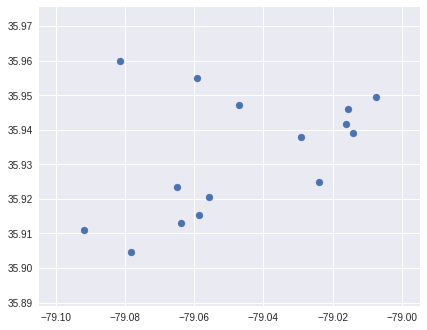

In [7]:
pickupLocations.plot()

In [8]:
def map_region(region):
  bounds = folium.GeoJson(region).get_bounds()
  center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
  m = folium.Map(
    location=center,
    zoom_start=13,
    tiles='OpenStreetMap'  
  )
  
  #old code
  """folium.GeoJson(region).add_to(m)"""
  
  #new code
  for index, row in region.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['Locations']).add_to(m)

  return m
  
map_region(pickupLocations)